# Calculando a temperatura adiabática de chama com Cantera
## Cursos de Verão IFMG-Arcos 2023
### Rotinas computacionais aplicadas às Ciências Térmicas - GESESC
#### Autor: *Reginaldo Gonçalves Leão Junior*

O processo de determinação da temperatura adiabática pelo Cantera pode ser realizado de duas formas 
distintas:

1. Mistura de componentes por difusão;
2. Uso de pré-mistura de componentes.

Neste notebook vamos simular a queima de um gás cuja a composição química é dada pela seguinte *string*.

In [1]:
reagentes = 'CO:44.6, H2: 154.0, H2O:31.0, CH4:3.6, N2:2026.4, CO2:18.9, O2:513.9'

Esta é a composição típica de um N.m³ de um gás proveniente de um forno de indústria ciderúrgica e possui alto potencial energético devido à presença de hidrogênio, metano e monóxido de carbono.

O processo de modelagem inicia-se pela importação das funcionalidades da suíte Cantera e criação de um gás que conterá os componentes mencionados e as condições termodinâmicas iniciais.

Note o uso do mecanismo de reação GRIMECH3.0.

In [6]:
import cantera as ct
gas = ct.Solution('gri30.yaml')
p = ct.one_atm  # Pressão [Pa]
T0 = 300  # temperatura inicial do gás [K]

ModuleNotFoundError: No module named 'cantera'

Em seguida informa-se tais parâmetros para o gás. Neste caso, a propriedade `TPX` do gás recebe simultâneamente a temperatura inicial, pressão e frações molares.

In [3]:
gas.TPX = T0, p, reagentes

A chama é modelada pela classe `FreeFlame` do Cantera. Esta classe implementa um chama de fluxo livre para um fluxo de gás ideal também derivado do Cantera disponibilizado pela classe `IdealGasFlow`.

O segundo parâmetro passado para a classe ao se criar o objeto `chama`, o valor de `width` diz respeito a uma aproximação da extensão da chama. Aqui estima-se que o combustão deve estabilizar-se em até 3 cm, ou seja, segundo nosso "chute" a zona de pré-aquecimento e de queima têm aproximadamente esta extensão. 

**DICA:** *Pesquise pela teoria de Mallard e Le Chatelier para relembrar esses conceitos.

In [4]:
chama1 = ct.FreeFlame(gas, width=0.05) 

## Primeira Simulação
### Utilizando o modelo de transporte com pré-mistura dos compostos.

In [5]:
chama1.transport_model = 'Multi'

Após a seleção do modelo de transporte, procede-se a simulação.
Os parâmetros `loglevel` e `auto` passado ao solver, referem-se ao nível de exebição da saída, `0` não mostra qualquer descrição textual do processo de simulação, `5`, mostra todo o processo e a automatização do algoritmo buscando tentativas de recuperação de quaisquer erros numéricos que ocorram no processo, respectivamente.

Em nosso caso, não exibiremos os `logs` de execução e ativaremos a recuperação automática de erros.

In [6]:
chama1.solve(loglevel = 0, auto=True)

Se o processo terminar com sucesso então a temperatura adiabática de chama pode ser exibida da seguinte forma.

In [7]:
print(f'Temperatura Adiabática com pré-mistura de gases: {chama1.T.max():.3f} K')

Temperatura Adiabática com pré-mistura de gases: 924.437 K


Para exibir o perfil da chama graficamente faz-se:

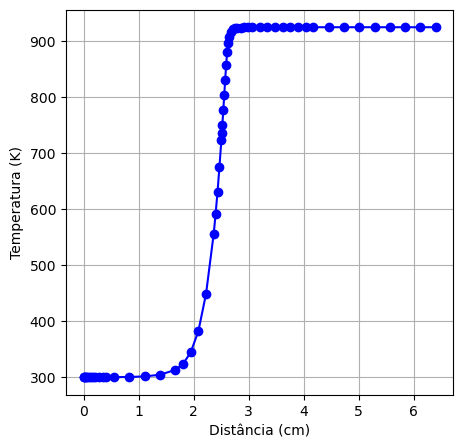

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(chama1.grid, chama1.T, "-o", color="blue")
ax.set_xlabel("Distância (cm)")
ax.set_ylabel("Temperatura (K)");
ax.grid()
plt.show()

Na geração da imagem, o atributos `chama.grid` e `chama.T`, referem-se à distância ao longo da chama e sua temperatura absoluta.

Para salvar os dados da simulação em um arquivo semelhante a uma planilha (extensão `csv`) é possível usar a seguinte rotina.

In [9]:
chama1.write_csv('temperaturadechamaadiabatica_mix.csv', quiet=False)

Solution saved to 'temperaturadechamaadiabatica_mix.csv'.


Em alguns estudos, pode ser necessário verificar como variou a composição do gás ao longo do processo. O arquivo salvo pode nos ajudar com isso.

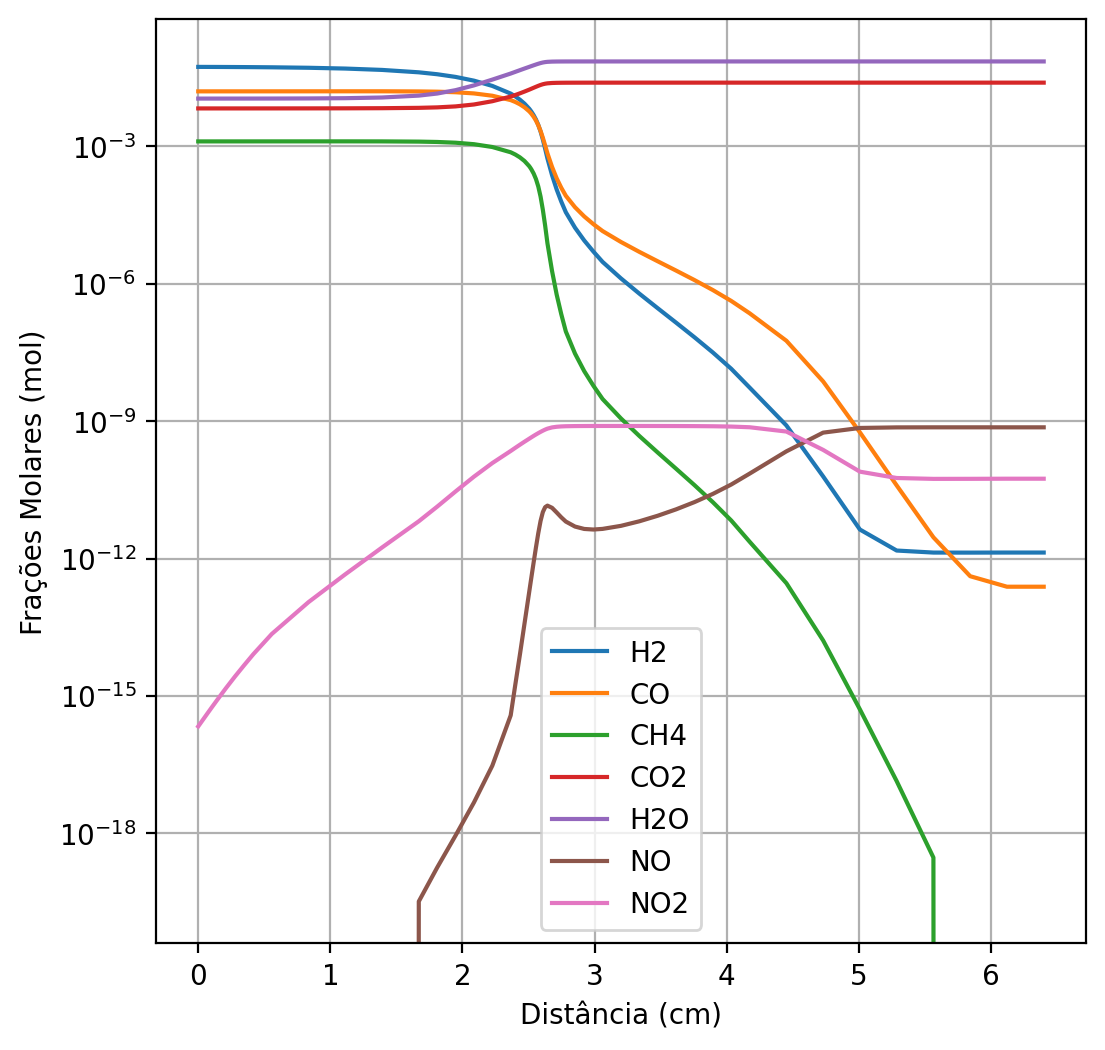

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

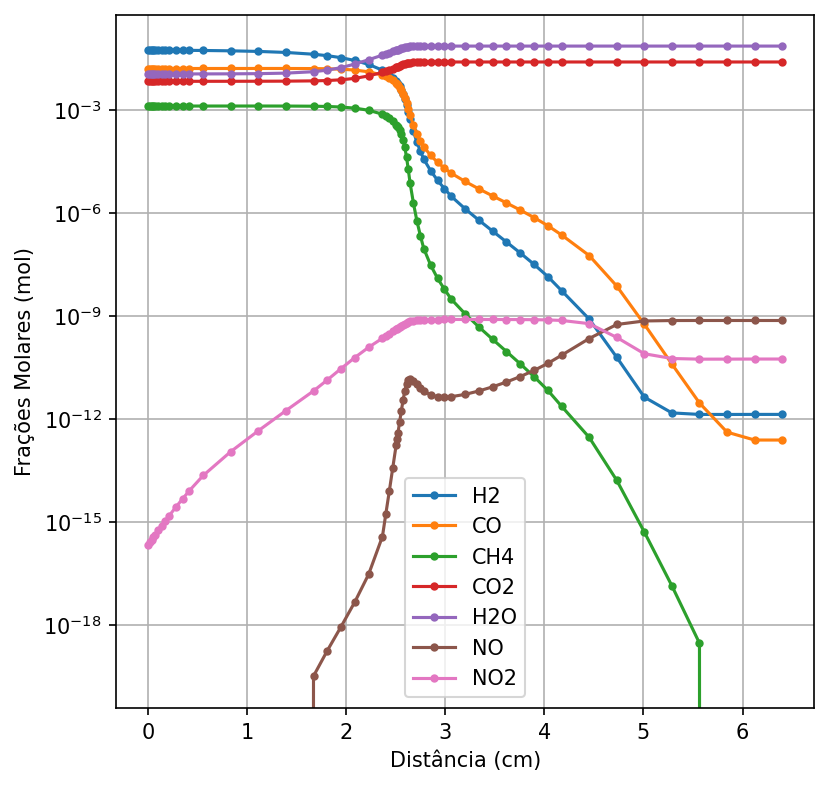

In [13]:
data = pd.read_csv('temperaturadechamaadiabatica_mix.csv')
fig, ax = plt.subplots(figsize=(6,6), dpi=150)
ax.plot(data["grid"], data["X_H2"], '.-', label="H2")
ax.plot(data["grid"], data["X_CO"], '.-', label="CO")
ax.plot(data["grid"], data["X_CH4"], '.-', label="CH4")
ax.plot(data["grid"], data["X_CO2"], '.-', label="CO2")
ax.plot(data["grid"], data["X_H2O"], '.-', label="H2O")
ax.plot(data["grid"], data["X_NO"], '.-', label="NO")
ax.plot(data["grid"], data["X_NO2"], '.-', label="NO2")
ax.set_yscale("log")
ax.set_xlabel("Distância (cm)")
ax.set_ylabel("Frações Molares (mol)");
ax.grid()
plt.legend()

### Atividade 1
Crie um novo gás agora para simular a chama utilizando o processo de transporte multi-componente (sem pré-mistura).
Para isso troque:

`chama1.transport_model = 'Mix`

por

`chama2.transport_model = 'Multi`

Mostre a temperatura adiabática e faça os mesmos gráficos.